In [438]:
import pandas as pd
import json
import requests
from matplotlib import pyplot as plt
import seaborn as sns

<h1>Gathering Data<h1>

**Work with twitter_archive_enhanced.csv**

In [439]:
#read data
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')

In [440]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Work with image_predictions.tsv**

In [441]:
#Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#create file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
#Import the tweet image predictions TSV file into a DataFrame
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')

**Working with tweet_json.txt**

In [442]:
twitter_list = []

# Read the .txt file line by line into a list of dictionaries
for line in open('tweet_json.txt', 'r'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                        'followers_count': twitter_data['user']['followers_count'],
                        'friends_count':twitter_data['user']['friends_count']})

# Convert the list of dictionaries to a pandas DataFrame
twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count','friends_count'])

<h1>Assessing data<h1>

In [443]:
twitter_data.head(5)

,tweet_id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104


In [444]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
 4   friends_count    2354 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 92.1+ KB


In [445]:
image_prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [446]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [447]:
image_prediction.duplicated().sum()

0

In [448]:
twitter_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [449]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Quality 

Twitter archive table



- Dropping some value do not need for analysis 
- Missing values in 'name' and dog stages represented as 'None'
- Some records have more than on dog stage
- text column includes a text and a hyperlink.
- Error in dog names (e.g a,an,the) are not a dog's name.
- Error datatype in column tweet_id

Image prediction table

- Error datatype in column tweet_id

twitter data table

- Error datatype in column tweet_id

### Tidiness

Twitter archive table


- doggo, floofer, pupper and puppo columns in twitter_archive table should be merged into one column named "dog_breed"

Image prediction table

- Image predictions table should be added to twitter archive table

twitter data table

- Twitter data table should be added to twitter archive table

<h1>Cleaning Data<h1>

In [450]:
# Make copies to preserve the original datasets
archive_clean = twitter_archive.copy()
image_clean = image_prediction.copy()
twitterapi_clean = twitter_data.copy()

# Issue #1:

## *Define*</br>
Drop column not need for analyzing

## *Code*</br>


In [451]:
archive_clean = archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

C:\Users\nghintb\AppData\Local\Temp\ipykernel_6324\3493320206.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  archive_clean = archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)


## *Test*</br>


In [452]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


# Issue #2:

## *Define*</br>
Remove hyperlink in tweet

## *Code*

In [453]:
#define function and apply to archive_clean table
def htmlink(x):
        http_pos = x.find("http")
        # If no link, retain row
        if http_pos == -1:
            x = x
        else:
            # Remove space before link to end
            x = x[:http_pos - 1]
        return x
    
archive_clean.text = archive_clean.text.apply(htmlink)

## *Test*

In [454]:
#confirm changes to show no hyperlink in column again
for row in archive_clean.text[:10]:
    print(row)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10
This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10
This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10
This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us
This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek
Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek
Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below

When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10
This is Zoey. She doesn't want to be one of the scary shark

# Issue #3:

## *Define*</br>
Some name of dog has inaccurate entries like **'a', 'such', 'by'** so I will replace by None

## Code

In [455]:
archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [456]:
archive_clean.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [457]:
archive_clean[archive_clean['name'].str.contains(r'^[a-z]')]['name'].count()

109

In [458]:
archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = pd.NA

C:\Users\nghintb\AppData\Local\Temp\ipykernel_6324\4232875954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = pd.NA


## Test

In [459]:
# confirm changes
archive_clean.name.value_counts()

None          745
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Devón           1
Gert            1
Dex             1
Ace             1
Christoper      1
Name: name, Length: 932, dtype: int64

## Issue #4: 

## *Define*</br>
Create a function to extract the dog stage from each of the four dog stage columns (i.e., doggo, puppo, pupper, and floofer). And store it to the column **dog_stage**

## *Code*

In [460]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2247 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


In [461]:
archive_clean['add']=archive_clean['doggo']+archive_clean['floofer']+archive_clean['pupper']+archive_clean['puppo']

In [462]:
archive_clean['add'].value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: add, dtype: int64

Some dog has 2 stage (ex doggo-pupper,doggo-floofer and doggo-pupo) so i will creta the fuction to repalce it to multiple_stages

In [463]:
# create function to extract the dog stage from the four columns
def choose_dog_stage(archive_clean):
    if archive_clean['add'].count('None')==2:
        return 'multiple_stages'
    else:
        if archive_clean['add'].count('doggo') == 1:
                    return 'Doggo'
        elif archive_clean['add'].count('floofer') == 1:
                    return 'Floofer'
        elif archive_clean['add'].count('pupper') == 1:
                    return 'Pupper'
        elif archive_clean['add'].count('puppo') == 1:
                    return 'Puppo'
        else:
                    return 'None'

## Test

In [464]:
# apply function
archive_clean['dog_breed'] = archive_clean.apply(choose_dog_stage, axis=1)

# drop columns since they won't be useful anymore
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [465]:
archive_clean['dog_breed'].unique()

array(['None', 'Doggo', 'Puppo', 'Pupper', 'Floofer', 'multiple_stages'],
      dtype=object)

# Issue #5: 

## *Define*

Wrong datatype in tweet_id 

## *Code*

In [466]:
# Convert tweet_id to str from twitter_archive, image_prediction, twitter_data tables.
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
twitterapi_clean.tweet_id = archive_clean.tweet_id.astype(str)

## *Test*

In [467]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   object
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2247 non-null   object
 7   add                 2356 non-null   object
 8   dog_breed           2356 non-null   object
dtypes: int64(2), object(7)
memory usage: 165.8+ KB


<h1> Tidiness<h1>

In [468]:
#merge the two tables
archive_clean = pd.merge(left=archive_clean, right=twitterapi_clean, how='left', on='tweet_id')
archive_clean = pd.merge(left=archive_clean, right=image_clean, how='left', on='tweet_id')

In [469]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   object 
 1   timestamp           2356 non-null   object 
 2   source              2356 non-null   object 
 3   text                2356 non-null   object 
 4   rating_numerator    2356 non-null   int64  
 5   rating_denominator  2356 non-null   int64  
 6   name                2247 non-null   object 
 7   add                 2356 non-null   object 
 8   dog_breed           2356 non-null   object 
 9   retweet_count       2354 non-null   float64
 10  favorite_count      2354 non-null   float64
 11  followers_count     2354 non-null   float64
 12  friends_count       2354 non-null   float64
 13  jpg_url             2075 non-null   object 
 14  img_num             2075 non-null   float64
 15  p1                  2075 non-null   object 
 16  p1_con

*Drop null value*

In [470]:
# drop rows with no image
archive_clean.dropna(axis = 0, inplace=True)

In [471]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1974 entries, 0 to 2351
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1974 non-null   object 
 1   timestamp           1974 non-null   object 
 2   source              1974 non-null   object 
 3   text                1974 non-null   object 
 4   rating_numerator    1974 non-null   int64  
 5   rating_denominator  1974 non-null   int64  
 6   name                1974 non-null   object 
 7   add                 1974 non-null   object 
 8   dog_breed           1974 non-null   object 
 9   retweet_count       1974 non-null   float64
 10  favorite_count      1974 non-null   float64
 11  followers_count     1974 non-null   float64
 12  friends_count       1974 non-null   float64
 13  jpg_url             1974 non-null   object 
 14  img_num             1974 non-null   float64
 15  p1                  1974 non-null   object 
 16  p1_con

**Save the final data**

In [472]:
archive_clean.to_csv('master_data.csv',index=False)

In [473]:
master_date = pd.read_csv('master_data.csv')
master_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1974 non-null   int64  
 1   timestamp           1974 non-null   object 
 2   source              1974 non-null   object 
 3   text                1974 non-null   object 
 4   rating_numerator    1974 non-null   int64  
 5   rating_denominator  1974 non-null   int64  
 6   name                1974 non-null   object 
 7   add                 1974 non-null   object 
 8   dog_breed           1974 non-null   object 
 9   retweet_count       1974 non-null   float64
 10  favorite_count      1974 non-null   float64
 11  followers_count     1974 non-null   float64
 12  friends_count       1974 non-null   float64
 13  jpg_url             1974 non-null   object 
 14  img_num             1974 non-null   float64
 15  p1                  1974 non-null   object 
 16  p1_con

<h1>Analyzing and Visualizing Data<h1>

**Change the data type of timestamp to timestamp and rating_numerator/rating_denominator to float**

In [474]:
master_date.timestamp = pd.to_datetime(master_date.timestamp)
master_date[['rating_numerator', 'rating_denominator']] = master_date[['rating_numerator', 'rating_denominator']].astype(float)

In [475]:
master_date.head(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,add,dog_breed,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,NoneNoneNoneNone,None,8853.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,NoneNoneNoneNone,None,6514.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,NoneNoneNoneNone,None,4328.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,NoneNoneNoneNone,None,8964.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,NoneNoneNoneNone,None,9774.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [476]:
master_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1974 non-null   int64              
 1   timestamp           1974 non-null   datetime64[ns, UTC]
 2   source              1974 non-null   object             
 3   text                1974 non-null   object             
 4   rating_numerator    1974 non-null   float64            
 5   rating_denominator  1974 non-null   float64            
 6   name                1974 non-null   object             
 7   add                 1974 non-null   object             
 8   dog_breed           1974 non-null   object             
 9   retweet_count       1974 non-null   float64            
 10  favorite_count      1974 non-null   float64            
 11  followers_count     1974 non-null   float64            
 12  friends_count       1974 non-null 

**Compare of dog stage**

In [477]:
nb_dog_range=master_date.dog_breed.value_counts()[1:5]
print(nb_dog_range)

Pupper             202
Doggo               65
Puppo               23
multiple_stages     11
Name: dog_breed, dtype: int64


Text(0, 0.5, 'number of apperence')

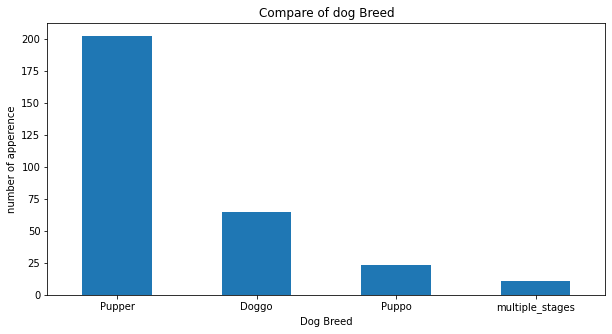

In [478]:
nb_dog_range.plot.bar(rot=0,figsize=(10, 5))

plt.title("Compare of dog Breed")
plt.xlabel("Dog Breed")
plt.ylabel("number of apperence")

Pupper is the most popular dog breed

**Top 10 popular name**

In [479]:
name = master_date.name.value_counts()[1:11]
name

Charlie    11
Lucy       10
Oliver     10
Tucker     10
Penny      10
Cooper     10
Bo          8
Winston     8
Lola        8
Sadie       8
Name: name, dtype: int64

Text(0, 0.5, 'number of appearance')

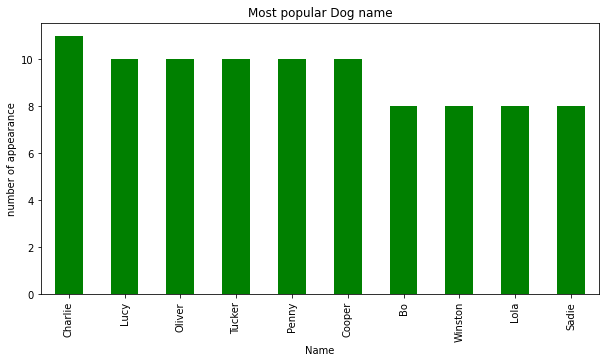

In [480]:
name_bar=name.plot.bar(width=.5,color="green",figsize=(10, 5))
plt.title("Most popular Dog name")
plt.xlabel("Name")
plt.ylabel("number of appearance")


Bo, Loki and Cooper are the top 3 most popular Dog name 

**Retweets over time**

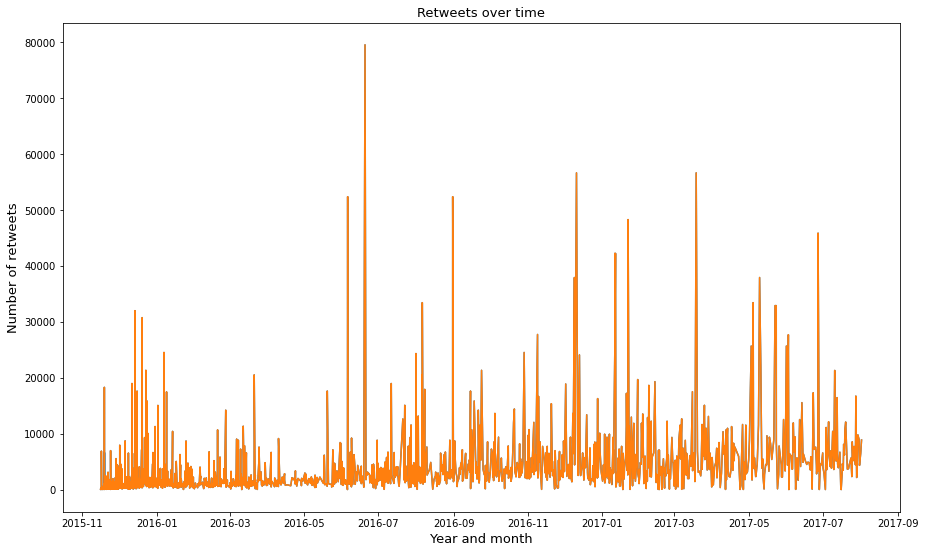

In [481]:
plt.subplots(figsize=(15, 9))
sns.lineplot(x=master_date.timestamp, y=master_date.retweet_count)
plt.plot(master_date.timestamp, master_date.retweet_count)
plt.title('Retweets over time', color = 'black', fontsize = '13')
plt.xlabel('Year and month', color = 'black', fontsize = '13')
plt.ylabel('Number of retweets', color = 'black', fontsize = '13');